In [1]:
#데이터 불러오기
import pandas as pd
df = pd.read_csv("C:/Users/김찬희/인공지능개론/12주차/seeds_dataset.txt", sep="\t", header=None)
df

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [2]:
#결측치 확인
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

<Axes: ylabel='count'>

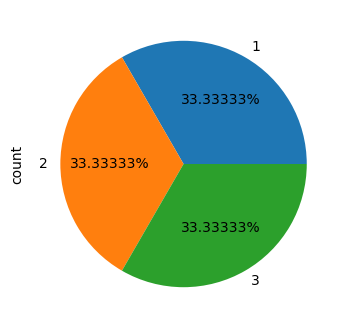

In [3]:
#라벨 확인
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (4,4)
df[7].value_counts().plot(kind='pie', autopct='%0.05f%%')

In [4]:
# 특성, 라벨 분류 및 to_array
x=df.drop(7,axis=1).values
y=df[7].values-1
x.shape,y.shape

((210, 7), (210,))

In [5]:
# train - test 분류
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((157, 7), (53, 7), (157, 1), (53, 1))

In [6]:
# 특성 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train[:5], x_test[:5]

(array([[-1.1322672 , -1.12293845, -1.06231947, -1.06492483, -1.07555327,
          1.96664972, -0.95052093],
        [-1.25813967, -1.41179503, -0.10099056, -1.42244601, -1.16649428,
          0.23585224, -1.21311209],
        [ 0.12985948,  0.20732214, -0.03262939,  0.17282256, -0.0440224 ,
          0.55550402, -0.21608629],
        [ 0.66056504,  0.70902042,  0.35190217,  0.85844863,  0.58996635,
          0.20531639,  0.86505075],
        [-0.91454184, -0.92529973, -0.53252043, -0.89974099, -0.90926114,
          0.75950943, -0.53611926]]),
 array([[ 1.46342729e+00,  1.56038720e+00,  5.70946368e-02,
          1.65495153e+00,  1.09663769e+00, -2.15038701e-01,
          1.66103020e+00],
        [ 1.39538812e+00,  1.58319166e+00, -4.85522124e-01,
          2.06225414e+00,  1.06805623e+00,  1.96068325e-03,
          2.21288193e+00],
        [-1.20030637e+00, -1.10773547e+00, -1.76302143e+00,
         -1.04455970e+00, -1.53545495e+00,  4.21666080e-01,
         -5.89458089e-01],
       

In [8]:
#하이퍼 파라미터 튜닝
from keras import Input, Model
from keras.layers import Dense
from keras.optimizers import Adam

inputs = Input(shape=(7,))

x = Dense(32, activation='relu')(inputs)
x = Dense(16, activation='relu')(x)
x = Dense(8, activation='relu')(x)
outputs = Dense(3, activation='softmax')(x)


model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 947 (3.70 KB)

 Trainable params: 947 (3.70 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# 딥러닝 학습, 예측
model.fit(x=x_train, y=y_train, epochs=30, batch_size=32, validation_data= (x_test,y_test))
y_pred=model.predict(x_test)
y_pred[:5]

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - accuracy: 0.0408 - loss: 1.1771 - val_accuracy: 0.1321 - val_loss: 1.1467
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2441 - loss: 1.1067 - val_accuracy: 0.2642 - val_loss: 1.0879
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4035 - loss: 1.0465 - val_accuracy: 0.3962 - val_loss: 1.0336
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4691 - loss: 1.0231 - val_accuracy: 0.5094 - val_loss: 0.9786
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6013 - loss: 0.9383 - val_accuracy: 0.5849 - val_loss: 0.9223
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6630 - loss: 0.8921 - val_accuracy: 0.6038 - val_loss: 0.8711
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6973 - loss: 0.8279 - val_accuracy: 0.6038 - val_loss: 0.8238
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6521 - loss: 0.7999 - val_accuracy: 0.6038 - val_loss: 0.7817

array([[2.3316862e-02, 9.7607929e-01, 6.0384197e-04],
       [1.1166750e-02, 9.8859918e-01, 2.3413634e-04],
       [7.9289973e-03, 7.1067954e-03, 9.8496419e-01],
       [6.3801357e-03, 5.7502692e-03, 9.8786956e-01],
       [4.3220180e-01, 3.9613995e-01, 1.7165826e-01]], dtype=float32)

In [10]:
# pred 변환

import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred[:5]

array([1, 1, 2, 2, 0], dtype=int64)

In [11]:
# score 확인
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("정확도:", acc)

정확도: 0.8490566037735849
